In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#### DATA: DO NOT EDIT THIS CELL ####
X = np.array([[1, -3], [1, 0], [4, 1], [3, 7], [0, -2],
             [-1, -6], [2, 5], [1, 2], [0, -1], [-1, -4],
             [0, 7], [1, 5], [-4, 4], [2, 9], [-2, 2],
             [-2, 0], [-3, -2], [-2, -4], [3, 10], [-3, -8]]).T
y = np.array([1, 1, 1, 1, 1,
             1, 1, 1, 1, 1,
             -1, -1, -1, -1, -1,
             -1, -1, -1, -1, -1])

In [3]:
print(X.shape) #(d , n)
print(y.shape) #(n,0)

(2, 20)
(20,)


## viualize dataset

In [4]:
y_color = np.where(y==1 , 'green' , 'red')
print(y)
print(y_color)

[ 1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
['green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red']


In [5]:
feature1 = X[0, :]

In [6]:
feature2 = X[1 , :]

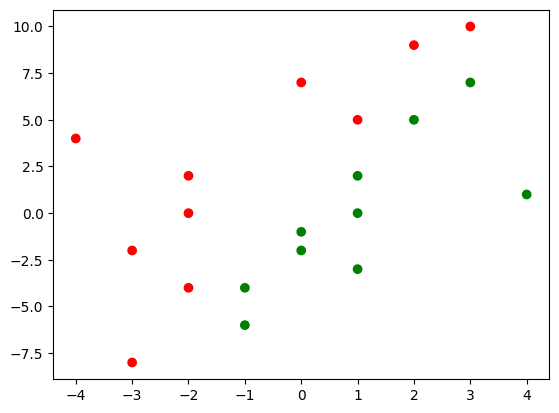

In [7]:
plt.scatter(feature1 , feature2 , c = y_color )

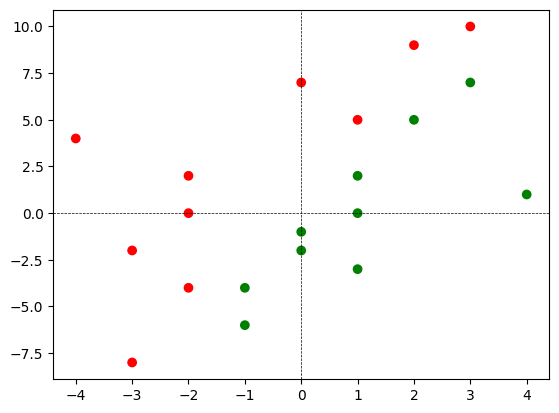

In [8]:
plt.scatter(feature1 , feature2 , c = y_color )
plt.axhline(color = 'black' , linewidth = 0.5 , linestyle = '--')
plt.axvline(color = 'black' , linewidth = 0.5 , linestyle = '--')

## Linear seprability

veify linar seprability can't prove it

In [9]:
d , n = X.shape

In [10]:
# initialize weight vector
w = np.zeros(d)
w

array([0., 0.])

In [11]:
correct = 0
i = 0
epochs = 0
while correct != n:
    #Prediction
    y_hat = 1 if w @ X[: , i] >=0 else -1
    # mistake
    if y_hat != y[i]:
        w += X[: , i] * y[i]
        correct = 0
    else:
        correct +=1
    i +=1
    #cycle back
    if i ==n :
        i = 0
        epochs +=1
print(f"{epochs=}")

epochs=4


In [12]:
w_norm = np.linalg.norm(w)
w/=w_norm
w

array([ 0.94174191, -0.3363364 ])

#### visualize perceptron weight vector

(-6.0, 6.0)

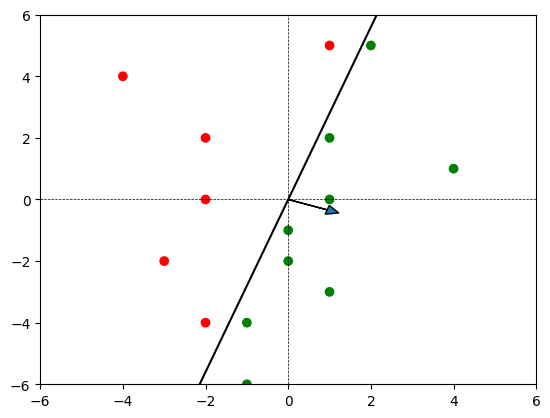

In [ ]:
plt.scatter(feature1 , feature2 , c = y_color )
plt.axhline(color = 'black' , linewidth = 0.5 , linestyle = '--')
plt.axvline(color = 'black' , linewidth = 0.5 , linestyle = '--')

x_db = np.linspace(-4 , 4)
y_db = -w[0]/w[1]*x_db
plt.plot(x_db , y_db , color = 'black')
plt.arrow(0,0,w[0],w[1] , head_width = 0.3 , head_length = 0.3)
plt.xlim(-6,6)
plt.ylim(-6,6)


## computing dual objective

In [14]:
Y = np.diag(y)
print(y)
print(Y)

[ 1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 

In [15]:
# computing matrix Q = Y.T @ X.T @ X @ Y
Q = Y.T @ X.T @ X @ Y
print(Q)
print(Q.shape)

[[ 10   1   1 -18   6  17 -13  -5   3  11  21  14  16  25   8   2  -3 -10
   27 -21]
 [  1   1   4   3   0  -1   2   1   0  -1   0  -1   4  -2   2   2   3   2
   -3   3]
 [  1   4  17  19  -2 -10  13   6  -1  -8  -7  -9  12 -17   6   8  14  12
  -22  20]
 [-18   3  19  58 -14 -45  41  17  -7 -31 -49 -38 -16 -69  -8   6  23  34
  -79  65]
 [  6   0  -2 -14   4  12 -10  -4   2   8  14  10   8  18   4   0  -4  -8
   20 -16]
 [ 17  -1 -10 -45  12  37 -32 -13   6  25  42  31  20  56  10  -2 -15 -26
   63 -51]
 [-13   2  13  41 -10 -32  29  12  -5 -22 -35 -27 -12 -49  -6   4  16  24
  -56  46]
 [ -5   1   6  17  -4 -13  12   5  -2  -9 -14 -11  -4 -20  -2   2   7  10
  -23  19]
 [  3   0  -1  -7   2   6  -5  -2   1   4   7   5   4   9   2   0  -2  -4
   10  -8]
 [ 11  -1  -8 -31   8  25 -22  -9   4  17  28  21  12  38   6  -2 -11 -18
   43 -35]
 [ 21   0  -7 -49  14  42 -35 -14   7  28  49  35  28  63  14   0 -14 -28
   70 -56]
 [ 14  -1  -9 -38  10  31 -27 -11   5  21  35  26  16  47   8  -2

In [ ]:
def f(alpha):
    return 0.5 * alpha @ Q @ alpha - alpha.sum()